# <font color="green"><center> HR_DATA_Attrition_EDA

**1. What is HR analytics?**

Human resource analytics is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.


**2. What is attrition in business?**

Attrition in business describes a gradual but deliberate reduction of staff numbers that occurs as employees retire or resign and are not replaced. The term is also sometimes used to describe the loss of customers or clients as they mature beyond a product or company's target market without being replaced by a younger generation.

**3. How attrition affect a company?**

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


**4. What are Positive and Negative attrition?**

   **Positive attrition:**
Positive attrition refers to staff turnover that actually benefits the organization. Think of an employee who is a poor performer, makes many errors, has difficulty working with others, delivers low quality customer service and/or uses sick leave and vacation time as the hours are earned. When the employee quits, the organization benefits because now the supervisor can replace the low performer employee with someone who is better for the organization.


   **Negative attrition:**
Negative attrition refers to the loss of an employee the organization would like to keep. Qualified and skilled employees leave for a variety of reasons, and it is often challenging to find an equally skilled replacement. Negative attrition, especially in industries with the highest turnover rates, is expensive. The organization must once again recruit, assess, hire and train a new employee, and until the position is filled, team productivity declines.

**Our Objectives:**

• Study the HR employee attrition data to identify the patters and causes of attrition with respect to various parameters.

• Identify the important parameter and generate helpful insights from them.

• Build model to predict if the employee is unsatisfied and will resign or is satisfied and will stay.

• Compare the parameters of a satisfied and an unsatisfied employee to come up with idea of what can be improved.

• Identify future attrition early so that proper measures can be taken on time.¶

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)

In [2]:
data = pd.read_csv(r"C:\Users\Pramod Rathod\Desktop\skillto practice\row data\HR_Data.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
print("The total number of rows:{} and columns:{}",format((data.shape[0],data.shape[1])))

The total number of rows:{} and columns:{} (1470, 35)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
data.describe(include= "object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
data[['DailyRate','HourlyRate','MonthlyRate','StandardHours']].describe()

,DailyRate,HourlyRate,MonthlyRate,StandardHours
count,1470.000000,1470.000000,1470.000000,1470.0
mean,802.485714,65.891156,14313.103401,80.0
std,403.509100,20.329428,7117.786044,0.0
min,102.000000,30.000000,2094.000000,80.0
25%,465.000000,48.000000,8047.000000,80.0
50%,802.000000,66.000000,14235.500000,80.0
75%,1157.000000,83.750000,20461.500000,80.0
max,1499.000000,100.000000,26999.000000,80.0


**Skewness And Kurtosis**

**Skewness**: it is measure of symmetry, or more precisely, the lack of symmetry.
**if the skewness is between**
- -0.5 to 0.5 the data are nearly symmetry.
- -1 to -0.5 negative skewed
- 0.5 to 1 positive skewed

**Kurtosis**: Kurtosis is a statistical measure used to describe the degree to which score cluster in the tails or the peak of a frequency distribution.

- The peak is the tallest part of the distribution, and the tails are the ends of the distribution. 
- There are three types of Kurtosis mesokurtic, leptokurtic and platkurtic



Skewness for Hourly Rate is : -0.03231095290044942
Kurtosis for Hourly Rate is : -1.1963984562565886


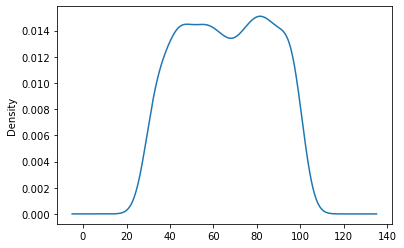

In [8]:
data['HourlyRate'].plot(kind='kde') 
print('Skewness for Hourly Rate is :' ,data['HourlyRate'].skew())
print('Kurtosis for Hourly Rate is :' ,data['HourlyRate'].kurt())

Skewness for Hourly Rate is : 0.018577807891132458
Kurtosis for Hourly Rate is : -1.2149560995878737


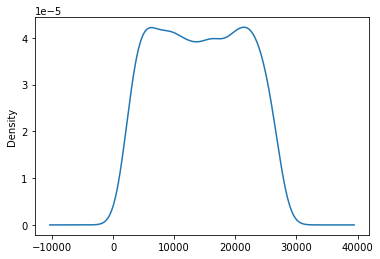

In [9]:
data['MonthlyRate'].plot(kind='kde') 
print('Skewness for Hourly Rate is :' ,data['MonthlyRate'].skew())
print('Kurtosis for Hourly Rate is :' ,data['MonthlyRate'].kurt())

Skewness for Hourly Rate is : -0.003518568352325854
Kurtosis for Hourly Rate is : -1.2038228076234574


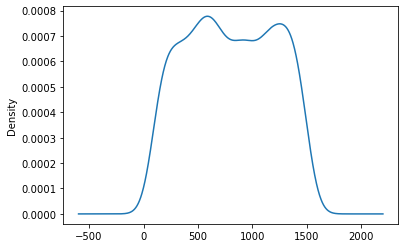

In [10]:
data['DailyRate'].plot(kind='kde') 
print('Skewness for Hourly Rate is :' ,data['DailyRate'].skew())
print('Kurtosis for Hourly Rate is :' ,data['DailyRate'].kurt())

In [11]:
pd.DataFrame({'Count':data.isnull().sum(),'Missing%':data.isnull().mean()*100}).T

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# drop columns (Insignificant Features)
data.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True) 

**Features Transformation**

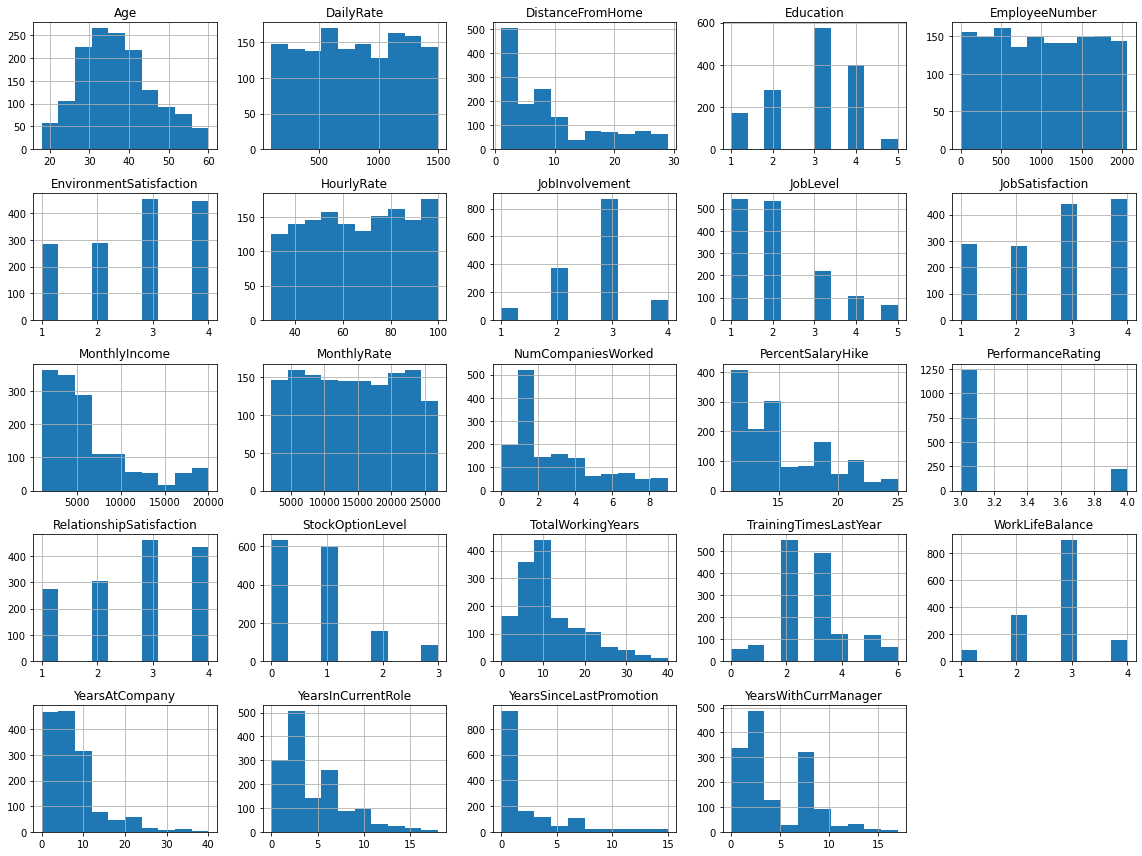

In [13]:
data.hist(figsize=(16,12))
plt.tight_layout()

In [14]:
for i in data.select_dtypes(exclude='O'):
    if data[i].skew() > 0.9:
        print(i,':',data[i].skew())             
        
#These are the numerical columns with high skewness 


DistanceFromHome : 0.9581179956568269
JobLevel : 1.0254012829518246
MonthlyIncome : 1.3698166808390662
NumCompaniesWorked : 1.026471111968205
PerformanceRating : 1.921882702142603
StockOptionLevel : 0.9689803167738937
TotalWorkingYears : 1.1171718528128527
YearsAtCompany : 1.7645294543422085
YearsInCurrentRole : 0.9173631562908262
YearsSinceLastPromotion : 1.9842899833524859


In [15]:
for i in data.select_dtypes(exclude='O'):
    if data[i].skew() > 0.9:
        data[i]=data[i].transform(lambda x:np.log1p(x))

In [16]:
for i in data.select_dtypes(exclude='O'):
    if data[i].skew() > 0:
        print(i,':',data[i].skew())

Age : 0.4132863018563338
EmployeeNumber : 0.016574019580105036
JobLevel : 0.4481334349835919
MonthlyIncome : 0.2864483763069351
MonthlyRate : 0.018577807891132458
NumCompaniesWorked : 0.09289622460196824
PercentSalaryHike : 0.8211279755780908
PerformanceRating : 1.9218827021425997
StockOptionLevel : 0.27196254237149353
TrainingTimesLastYear : 0.5531241710537028
YearsSinceLastPromotion : 0.7188045525459852
YearsWithCurrManager : 0.8334509919918475


# EDA Process

No     1233
Yes     237
Name: Attrition, dtype: int64


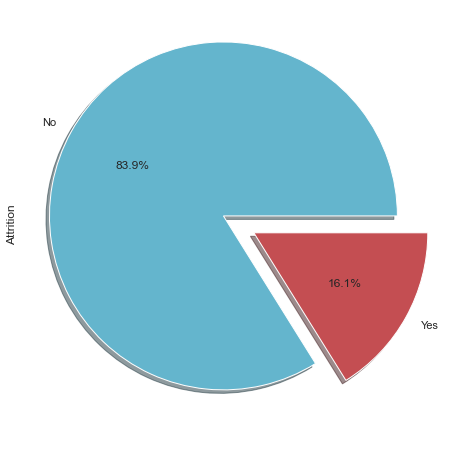

In [17]:
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
data['Attrition'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(data['Attrition'].value_counts())

Gender     Female  Male
Attrition              
No          34.08  49.8
Yes          5.92  10.2


<AxesSubplot:title={'center':'Gender Vs MonthlyIncome'}, xlabel='Gender', ylabel='MonthlyIncome'>

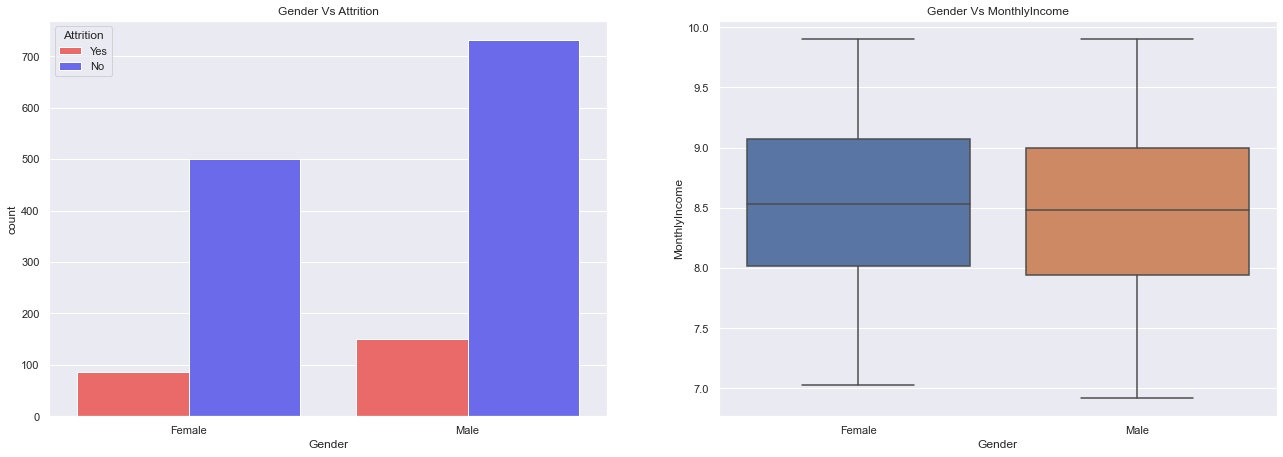

In [18]:
print(round(pd.crosstab(data['Attrition'],data['Gender'],normalize=True)*100,2))

plt.figure(figsize=(22,16))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title('Gender Vs Attrition')
sns.countplot('Gender',hue='Attrition',data=data,palette='seismic_r')

plt.subplot(222)
plt.title('Gender Vs MonthlyIncome')
sns.boxplot(data['Gender'],data['MonthlyIncome'])

In [19]:
pd.pivot_table(data=data,index=['Gender'],
               values=['MonthlyIncome'],
               aggfunc='mean').style.set_properties(**{'background-color': 'black','color': 'lawngreen',})

,MonthlyIncome
Gender,
Female,8.588669
Male,8.528806


# Key Inferences

- Males have a higher rate of attrition
- Females are earning a little higher than males

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92


<AxesSubplot:title={'center':'Department Vs MonthlyIncome'}, xlabel='Department', ylabel='MonthlyIncome'>

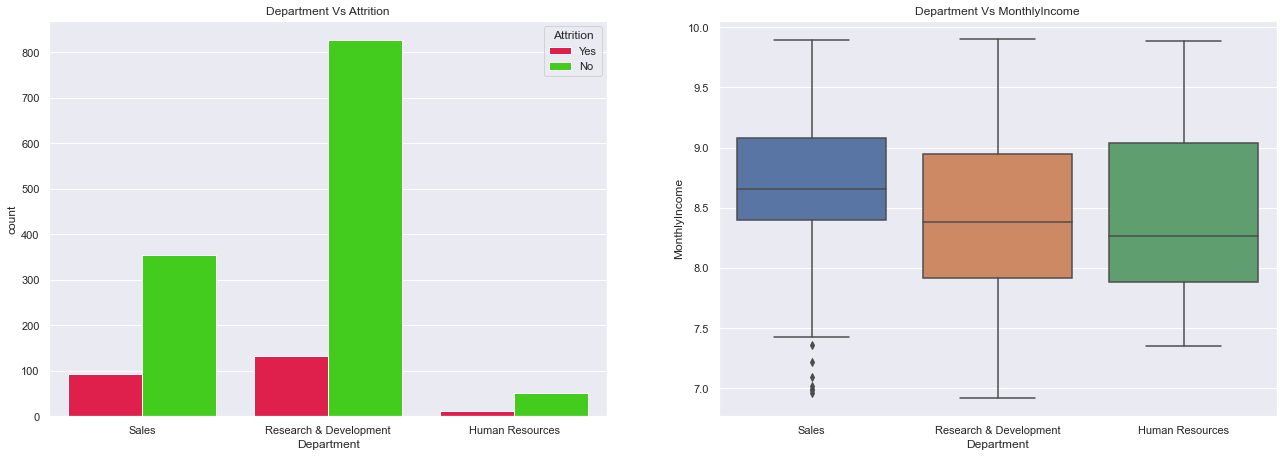

In [20]:
print (pd.crosstab(data['Attrition'],data['Department']))

plt.figure(figsize=(22,16))
sns.set(style="darkgrid")
plt.subplot(221)
plt.title('Department Vs Attrition')
sns.countplot(data['Department'],hue=data['Attrition'],palette='prism_r')

plt.subplot(222)
plt.title('Department Vs MonthlyIncome')
sns.boxplot(data['Department'],data['MonthlyIncome'])

In [21]:
#Average salary b/w different departments 
pd.pivot_table(data=data,index=['Department'],
               values=['MonthlyIncome'],
               aggfunc='mean').style.set_properties(**{'background-color': 'black','color': 'lawngreen',})

,MonthlyIncome
Department,
Human Resources,8.490352
Research & Development,8.493956
Sales,8.688253


In [22]:
pd.crosstab([data['Attrition']],data['JobRole'],normalize=True)*100

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,8.299320,2.721088,13.401361,6.598639,9.183673,5.306122,16.666667,18.299320,3.401361
Yes,0.612245,0.816327,4.217687,0.340136,0.680272,0.136054,3.197279,3.877551,2.244898


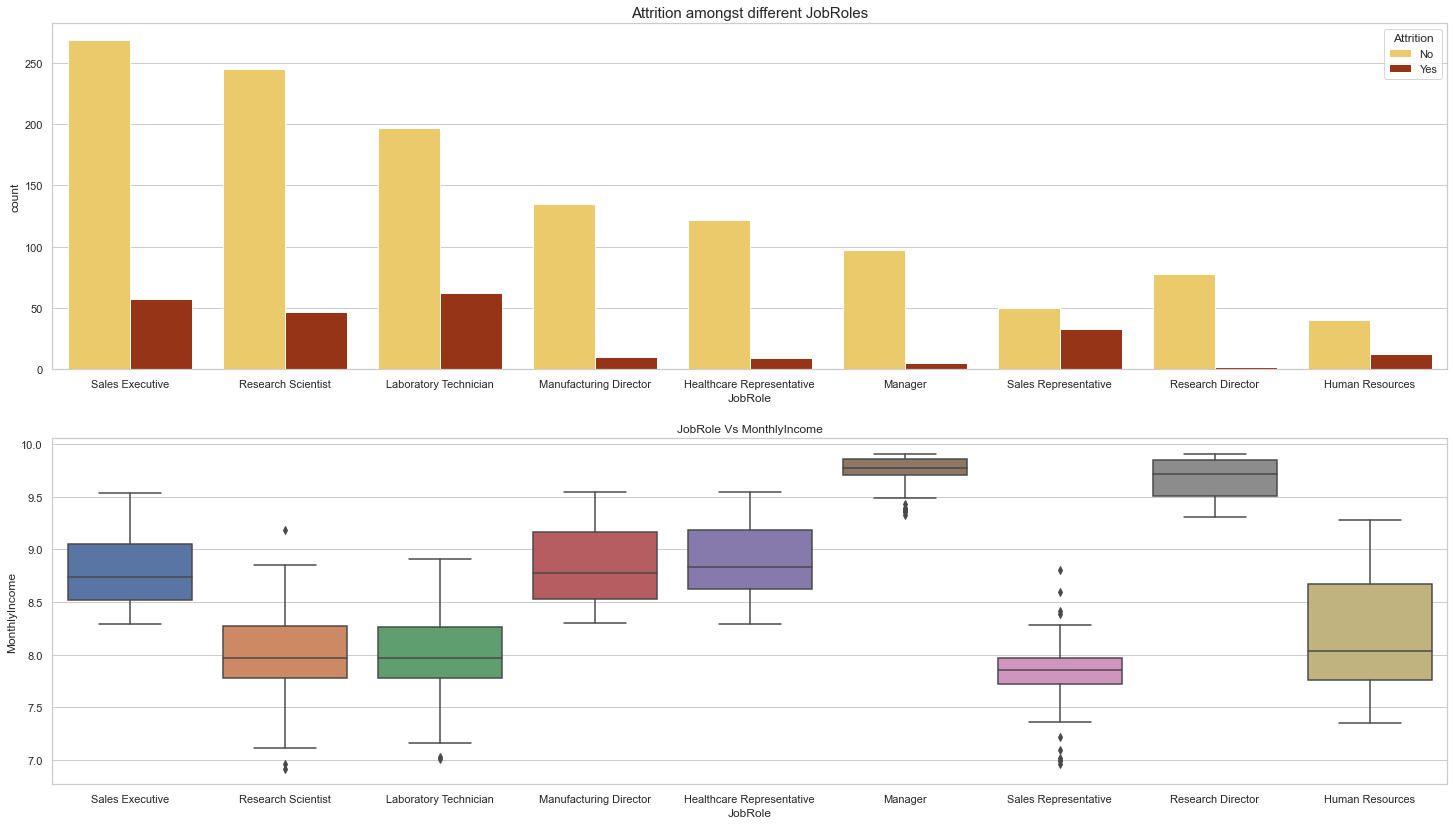

In [23]:
plt.figure(figsize=(25,14))
sns.set(style="whitegrid")


plt.subplot(211)
plt.title('JobRole Vs Attrition')
sns.countplot(data['JobRole'],palette='afmhot_r',hue=data['Attrition'].sort_values(ascending=True))
plt.title('Attrition amongst different JobRoles',size=15)


plt.subplot(212)
plt.title('JobRole Vs MonthlyIncome')
sns.boxplot(data['JobRole'],data['MonthlyIncome'])

plt.show()

**Why Sales Representative and Lab Technicians have a high attrition rate?**


In [24]:
pd.pivot_table(data=data,
               index=['JobRole'],
               values=['MonthlyIncome'],
               aggfunc='mean').sort_values(by='MonthlyIncome').style.set_properties(**{'background-color': 'black','color': 'lawngreen',})

,MonthlyIncome
JobRole,
Sales Representative,7.824619
Research Scientist,8.022366
Laboratory Technician,8.023821
Human Resources,8.213673
Sales Executive,8.789736
Manufacturing Director,8.832427
Healthcare Representative,8.871690
Research Director,9.666370
Manager,9.741503


Attrition        No  Yes
JobInvolvement          
1                55   28
2               304   71
3               743  125
4               131   13


<AxesSubplot:title={'center':'JobInvolvement Vs Monthly Income'}, xlabel='JobInvolvement', ylabel='MonthlyIncome'>

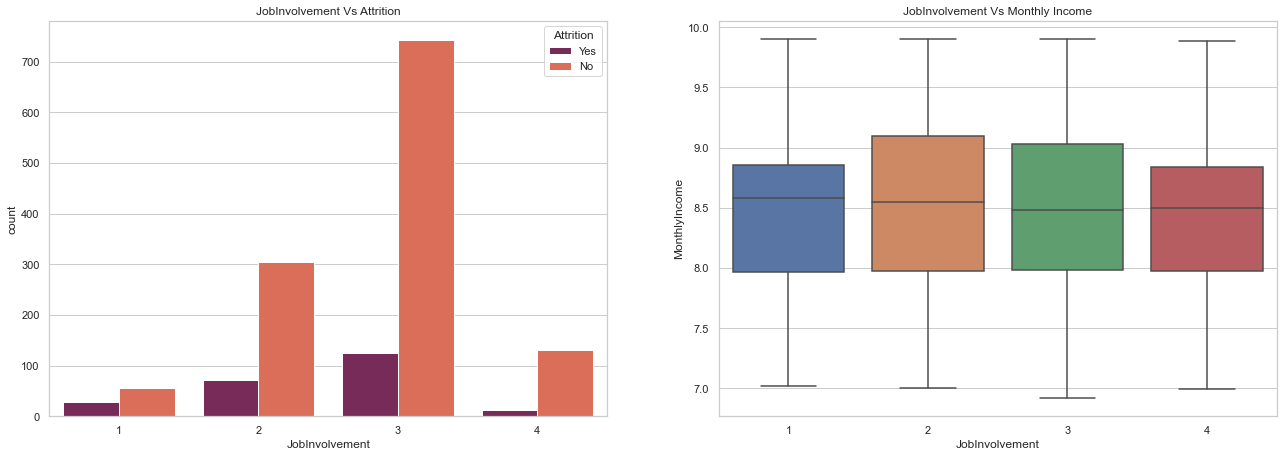

In [25]:
print(pd.crosstab(data['JobInvolvement'],data['Attrition']))

plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('JobInvolvement Vs Attrition')
sns.countplot(data['JobInvolvement'],hue=data['Attrition'],palette='rocket')

plt.subplot(222)
plt.title('JobInvolvement Vs Monthly Income')
sns.boxplot(data['JobInvolvement'],data['MonthlyIncome'])

<AxesSubplot:title={'center':'Education Vs MonthlyIncome'}, xlabel='Education', ylabel='MonthlyIncome'>

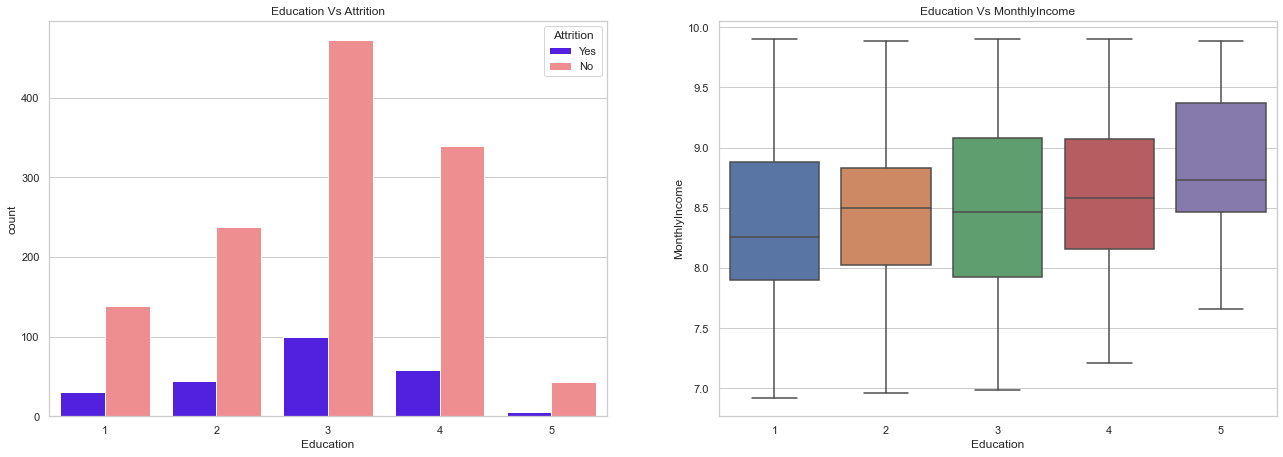

In [26]:
plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('Education Vs Attrition')
sns.countplot(data['Education'],hue=data['Attrition'],palette='gnuplot2')


plt.subplot(222)
plt.title('Education Vs MonthlyIncome')
sns.boxplot(data['Education'],data['MonthlyIncome'])

In [27]:
#Average salary b/w Education levels
pd.pivot_table(data=data,index=['Education'],
               values=['MonthlyIncome'],
               aggfunc='mean').style.set_properties(**{'background-color': 'black','color': 'lawngreen',})  

,MonthlyIncome
Education,
1,8.389690
2,8.526197
3,8.536898
4,8.629346
5,8.840096


As the level of education increases , average monthly income increases¶


Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32


<AxesSubplot:title={'center':'EducationField Vs Monthly Income'}, xlabel='EducationField', ylabel='MonthlyIncome'>

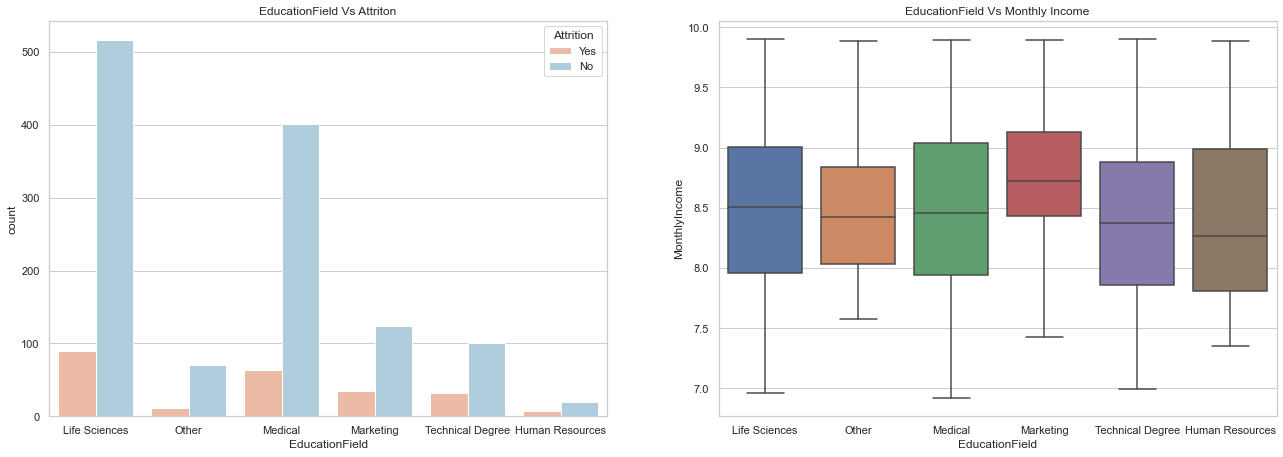

In [28]:
print(pd.crosstab(columns=data['Attrition'],index=data['EducationField']))

plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('EducationField Vs Attriton')
sns.countplot(data['EducationField'],hue=data['Attrition'],palette='RdBu')

plt.subplot(222)
plt.title('EducationField Vs Monthly Income')
sns.boxplot(data['EducationField'],data['MonthlyIncome'])

**Working with the Age Feature**

In [29]:
agebins=pd.cut(data['Age'],bins=[15,20,25,30,35,40,45,50,55,60]) 
#Discretisation to understand what age categories to Target

<AxesSubplot:title={'center':'Age Wise Binning wrt Attrition'}, xlabel='Age', ylabel='count'>

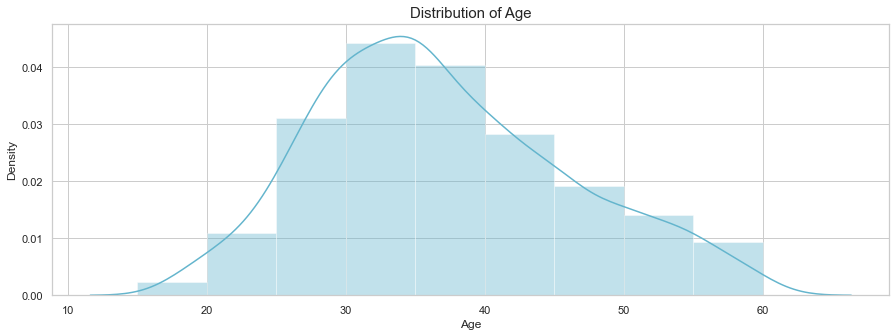

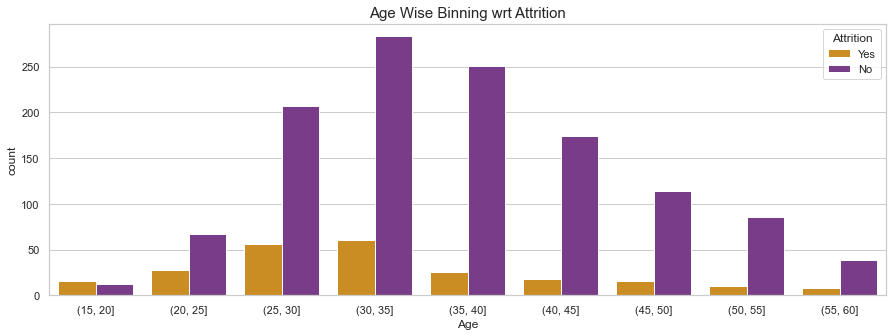

In [30]:
plt.figure(figsize=(15,5))
plt.title('Distribution of Age',size=15)
sns.distplot(data['Age'],bins=[15,20,25,30,35,40,45,50,55,60],color='c')

plt.figure(figsize=(15,5))
plt.title('Age Wise Binning wrt Attrition',size=15)
sns.countplot(agebins,hue='Attrition',data=data,palette='CMRmap_r')

EnvironmentSatisfaction    1    2    3    4
Attrition                                  
No                       212  244  391  386
Yes                       72   43   62   60


<AxesSubplot:title={'center':'EnvironmentSatisfaction Vs MonthlyIncome'}, xlabel='EnvironmentSatisfaction', ylabel='MonthlyIncome'>

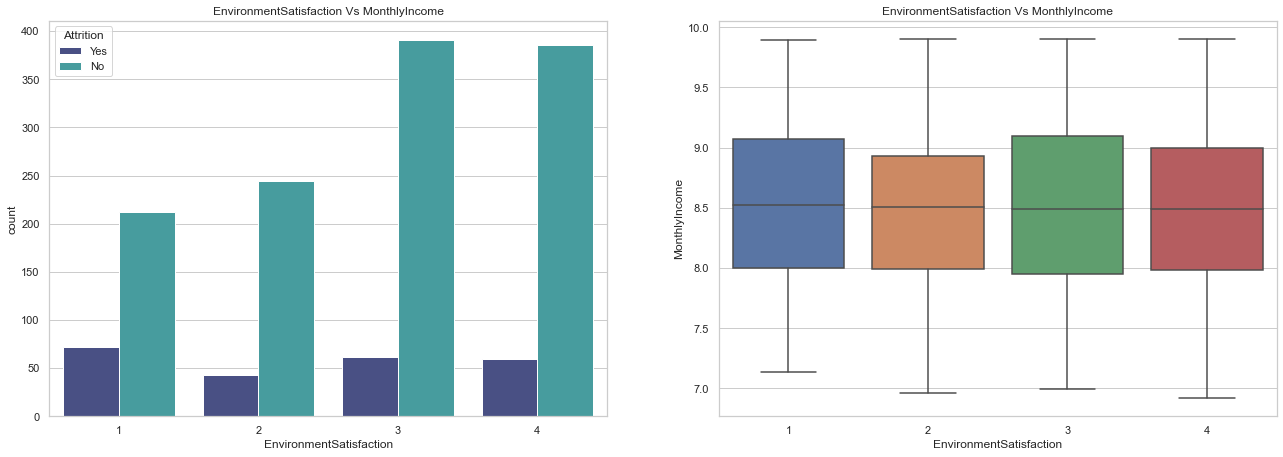

In [31]:
print(pd.crosstab(data['Attrition'],data['EnvironmentSatisfaction']))

plt.figure(figsize=(22,16))
plt.subplot(221)
plt.title('EnvironmentSatisfaction Vs MonthlyIncome')
sns.countplot(data['EnvironmentSatisfaction'],hue=data['Attrition'],palette='mako')


plt.subplot(222)
plt.title('EnvironmentSatisfaction Vs MonthlyIncome')
sns.boxplot(data['EnvironmentSatisfaction'],data['MonthlyIncome'])

In [32]:
data['EnvironmentSatisfaction'].value_counts().sort_values()

1    284
2    287
4    446
3    453
Name: EnvironmentSatisfaction, dtype: int64

Attrition rate is high for group1 and it makes sense as this group of employees are dissatisfied

with the environment conditions

MaritalStatus  Divorced  Married  Single
Attrition                               
No                  294      589     350
Yes                  33       84     120


<AxesSubplot:title={'center':'MaritalStatus Vs MonthlyIncome'}, xlabel='MaritalStatus', ylabel='MonthlyIncome'>

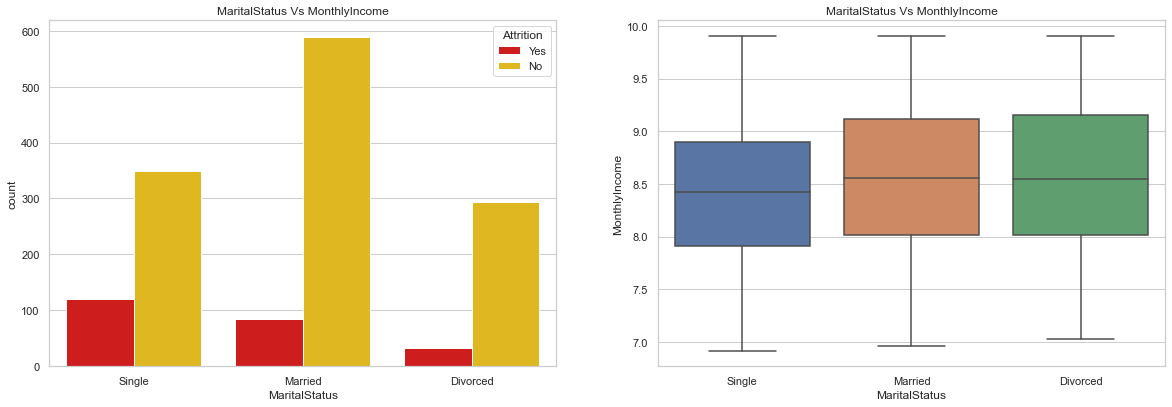

In [33]:
print(pd.crosstab(data['Attrition'],data['MaritalStatus']))

plt.figure(figsize=(20,14))
plt.subplot(221)
plt.title('MaritalStatus Vs MonthlyIncome')
sns.countplot(data['MaritalStatus'],hue=data['Attrition'],palette='hot')

plt.subplot(222)
plt.title('MaritalStatus Vs MonthlyIncome')
sns.boxplot(data['MaritalStatus'],data['MonthlyIncome'])

Higher rate of attrition for people who are single and it makes sense as most people with less

than 2 years of experience tend to leave.

<AxesSubplot:title={'center':'YearsInCurrentRole Vs MonthlyIncome'}, xlabel='YearsInCurrentRole', ylabel='MonthlyIncome'>

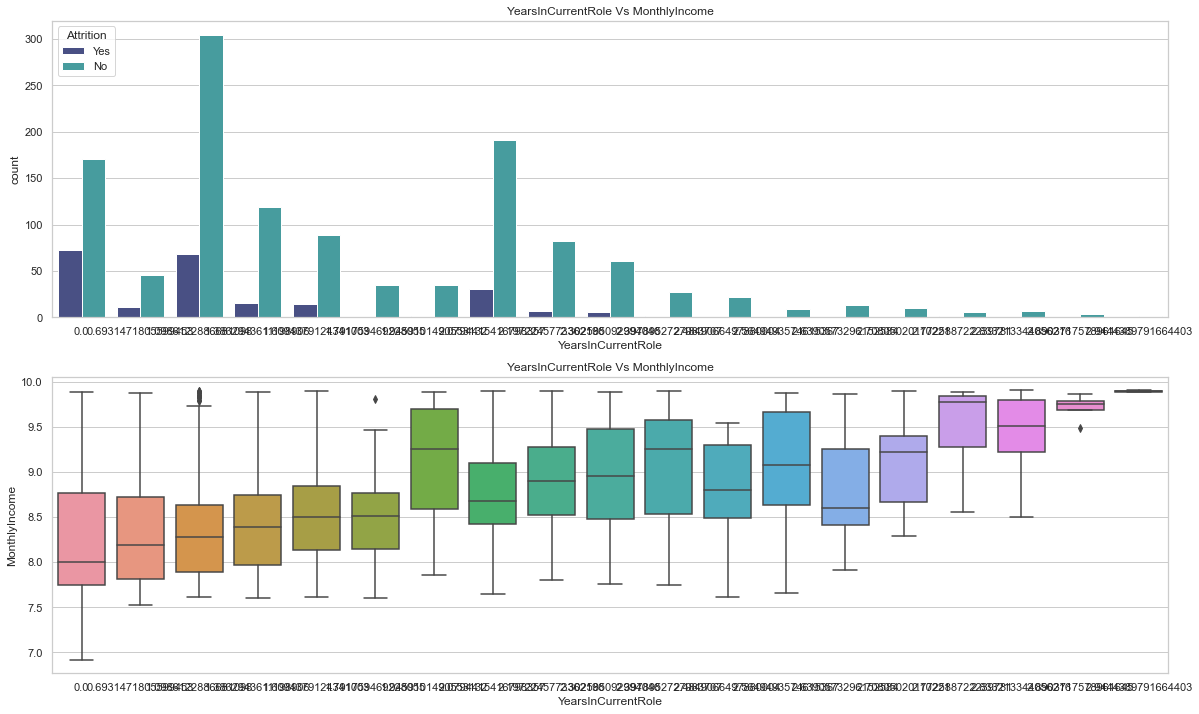

In [34]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('YearsInCurrentRole Vs MonthlyIncome')
sns.countplot(data['YearsInCurrentRole'],hue=data['Attrition'],palette='mako')


plt.subplot(212)
plt.title('YearsInCurrentRole Vs MonthlyIncome')
sns.boxplot(data['YearsInCurrentRole'],data['MonthlyIncome'])

In [35]:
len(data.loc[(data['YearsInCurrentRole']==7) | (data['YearsInCurrentRole']==8) | (data['YearsInCurrentRole']==9) & (data['Attrition']=='Yes')])/data.shape[0]*100

0.0

# Inferences ..
- Employees with 7,8 and 9 YearsInCurrentRole contribute to 21.5% of the total attrition rate in the organisation

- Employee with 6 years in Current Role is earning more than an employee carrying 14 years in Current Role

- Need to come up with better stock options for people with more than 6+ years in Current Role as attrition seems to increase gradually with a drop in monthly income

<AxesSubplot:title={'center':'YearsAtCompany Vs MonthlyIncome'}, xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

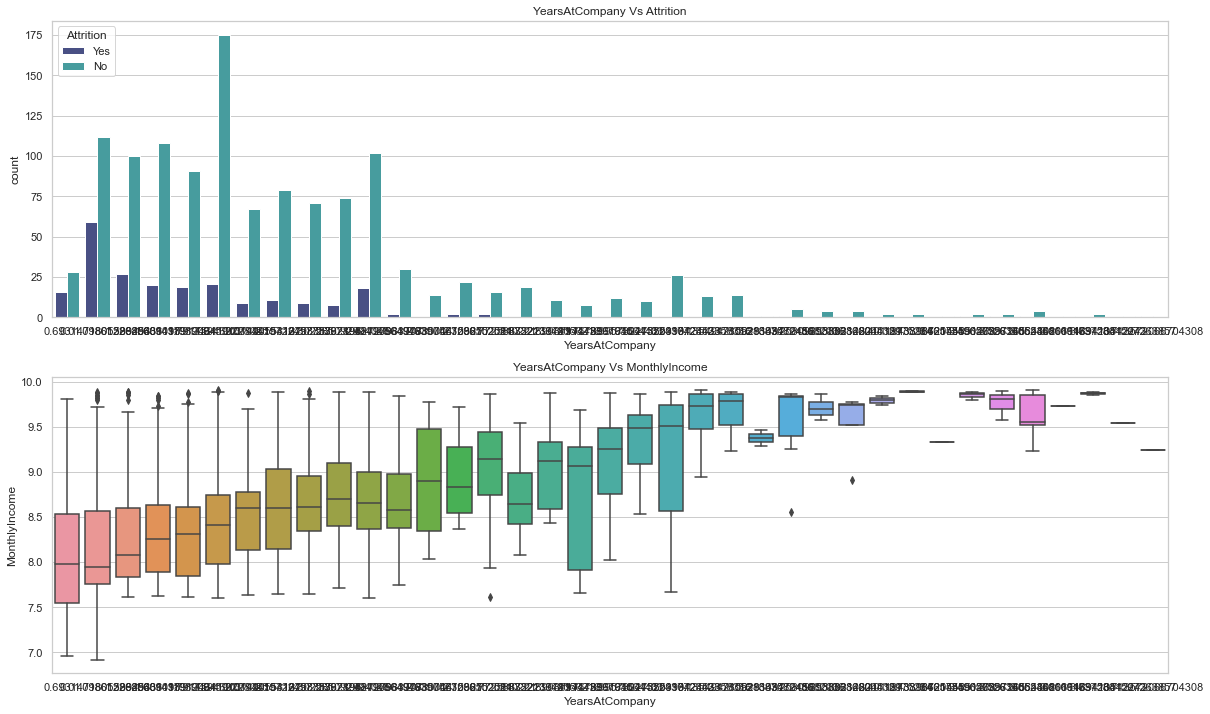

In [36]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('YearsAtCompany Vs Attrition')
sns.countplot(data['YearsAtCompany'],hue=data['Attrition'],palette='mako')


plt.subplot(212)
plt.title('YearsAtCompany Vs MonthlyIncome')
sns.boxplot(data['YearsAtCompany'],data['MonthlyIncome'])

In [37]:
print('The % of Attrition for employees carrying 0-5 years at company respectively: ')
print(len(data.loc[(data['YearsAtCompany']==0) & (data['Attrition']=='Yes')])/data.shape[0]*100)

print(len(data.loc[(data['YearsAtCompany']==1) & (data['Attrition']=='Yes')])/data.shape[0]*100)

print(len(data.loc[(data['YearsAtCompany']==2) & (data['Attrition']=='Yes')])/data.shape[0]*100)

print(len(data.loc[(data['YearsAtCompany']==3) & (data['Attrition']=='Yes')])/data.shape[0]*100)

print(len(data.loc[(data['YearsAtCompany']==4) & (data['Attrition']=='Yes')])/data.shape[0]*100)

print(len(data.loc[(data['YearsAtCompany']==5) & (data['Attrition']=='Yes')])/data.shape[0]*100)

The % of Attrition for employees carrying 0-5 years at company respectively: 
1.0884353741496597
0.0
0.0
0.0
0.0
0.0


# Important Questions ..

- What changes can be made to drop the % level for employees carrying 1 year of experience in the organisation ?

- Why is there a drop in income for Employees having 15 years of Experience in the company?

<AxesSubplot:title={'center':'TotalWorkingYears Vs MonthlyIncome'}, xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

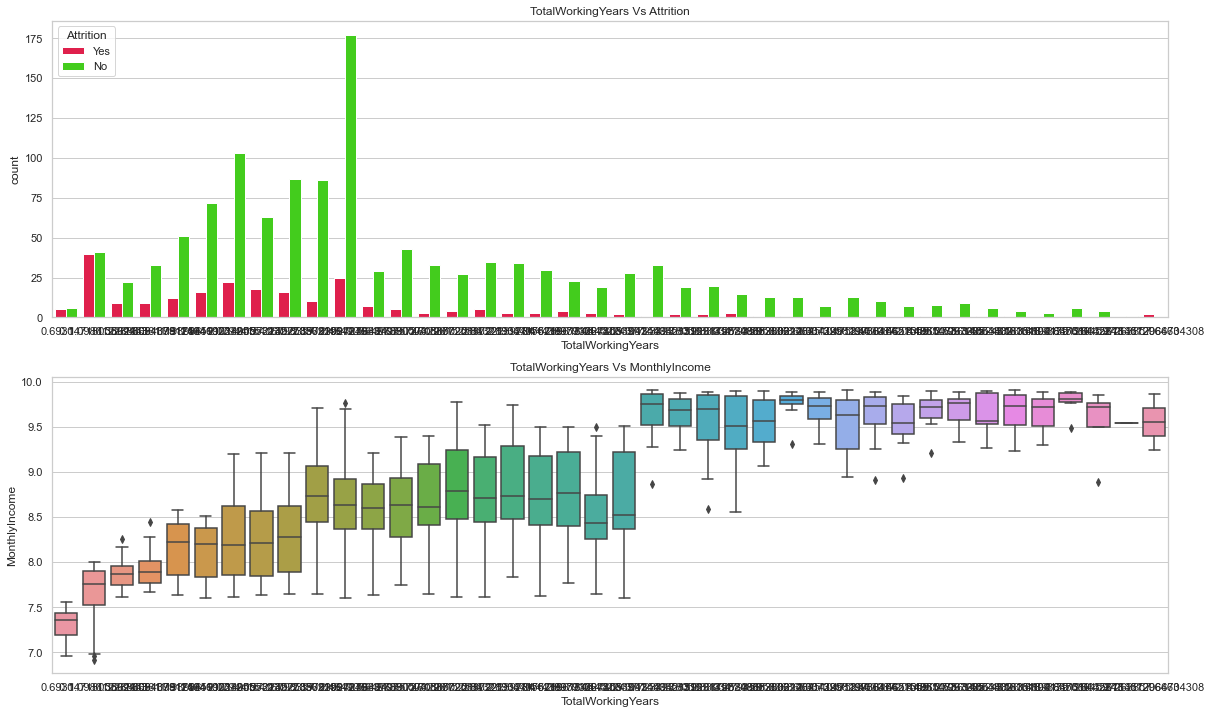

In [38]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('TotalWorkingYears Vs Attrition')
sns.countplot(data['TotalWorkingYears'],hue=data['Attrition'],palette='prism_r')


plt.subplot(212)
plt.title('TotalWorkingYears Vs MonthlyIncome')
sns.boxplot(data['TotalWorkingYears'],data['MonthlyIncome'])

<AxesSubplot:title={'center':'NumCompaniesWorked Vs Attrition'}, xlabel='NumCompaniesWorked', ylabel='count'>

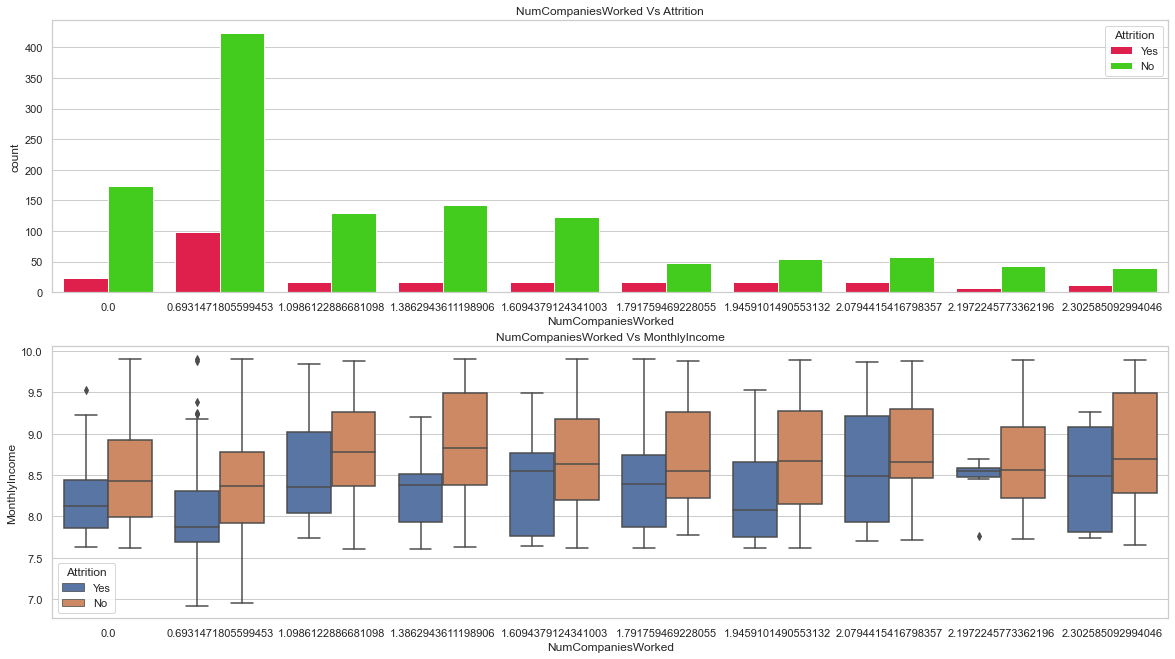

In [39]:
plt.figure(figsize=(20,11))
plt.subplot(212)
plt.title('NumCompaniesWorked Vs MonthlyIncome')
sns.boxplot(data['NumCompaniesWorked'],data['MonthlyIncome'],hue=data['Attrition'])

#plt.figure(figsize=(15,12))
plt.subplot(211)
plt.title('NumCompaniesWorked Vs Attrition')
sns.countplot(data['NumCompaniesWorked'],hue=data['Attrition'],palette='prism_r')

In [40]:
print('The % of Attrition for employees carrying 0-3 years at company respectively: ')
print(len(data.loc[(data['TotalWorkingYears']==0) & (data['Attrition']=='Yes')])/data.shape[0]*100)
print(len(data.loc[(data['TotalWorkingYears']==1) & (data['Attrition']=='Yes')])/data.shape[0]*100)
print(len(data.loc[(data['TotalWorkingYears']==2) & (data['Attrition']=='Yes')])/data.shape[0]*100)
print(len(data.loc[(data['TotalWorkingYears']==3) & (data['Attrition']=='Yes')])/data.shape[0]*100)

The % of Attrition for employees carrying 0-3 years at company respectively: 
0.3401360544217687
0.0
0.0
0.0


In [41]:
pd.pivot_table(data=data,index=['TotalWorkingYears'],
               values=['MonthlyIncome'],
               aggfunc='mean').sort_values(by='MonthlyIncome').style.set_properties(**{'background-color': 'black','color': 'lawngreen',})  

,MonthlyIncome
TotalWorkingYears,
0.0,7.313664
0.6931471805599453,7.657718
1.0986122886681098,7.869231
1.3862943611198906,7.914297
1.791759469228055,8.112650
1.6094379124341003,8.154250
2.0794415416798357,8.236079
1.9459101490553132,8.251988
2.1972245773362196,8.262289


# Key Inferences :-

- An innovative structure needs to be implemented for employees with 1 year of experience as it is majorly contributing to the attrition %

- Seems like the organisation has benefits in terms of income for people with 20+ years of experience

- Why people with 6 years of experience earning the same as employees with 19 years of experience ?

- Why employees with 21 years of work experience earning as much as an employee with 40 years of experience?

# Statistical Analysis

**Questions**

- Is gender influencing attrition?
- Which job role has a higher signifance in predecting attrition?
- Is Distance from home an important attribute?

In [42]:
from scipy.stats import chi2_contingency,chisquare,f_oneway

In [43]:
cat_cols = data.describe(include = "O").columns   
# Statistical analysis for categorical data types, Chisquare is performed 

In [44]:
chi_stat=[]
p_value=[]
for i in cat_cols:
    chi_res=chi2_contingency(np.array(pd.crosstab(data[i],data['Attrition'])))
    chi_stat.append(chi_res[0])
    p_value.append(chi_res[1])
chi_square=pd.DataFrame([chi_stat,p_value])
chi_square=chi_square.T
col=['Chi Square Value','P-Value']
chi_square.columns=col
chi_square.index=cat_cols

In [45]:
chi_square

,Chi Square Value,P-Value
Attrition,1462.614554,0.000000e+00
BusinessTravel,24.182414,5.608614e-06
Department,10.796007,4.525607e-03
EducationField,16.024674,6.773980e-03
Gender,1.116967,2.905724e-01
JobRole,86.190254,2.752482e-15
MaritalStatus,46.163677,9.455511e-11
OverTime,87.564294,8.158424e-21


In [46]:
chi_square[chi_square["P-Value"]<0.05]

,Chi Square Value,P-Value
Attrition,1462.614554,0.000000e+00
BusinessTravel,24.182414,5.608614e-06
Department,10.796007,4.525607e-03
EducationField,16.024674,6.773980e-03
JobRole,86.190254,2.752482e-15
MaritalStatus,46.163677,9.455511e-11
OverTime,87.564294,8.158424e-21


In [47]:
features_p = list(chi_square[chi_square["P-Value"]<0.05].index)
print("Significant categorical Features:\n\n",features_p)

Significant categorical Features:

 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


In [48]:
num_cols = data.describe().columns  
# statistical analysis for numerical data dtypes , Therefore performing ANOVA Test

In [49]:
f_stat=[]
p_val=[]
for i in num_cols:
    atr_0=data[data['Attrition']=="No"][i]
    atr_1=data[data['Attrition']=="Yes"][i]
    a=f_oneway(atr_0,atr_1)
    f_stat.append(a[0])
    p_val.append(a[1])
anova=pd.DataFrame([f_stat,p_val])
anova=anova.T
cols=['F-STAT','P-VALUE']
anova.columns=cols
anova.index=num_cols

In [50]:
anova

,F-STAT,P-VALUE
Age,38.175887,8.356308e-10
DailyRate,4.726640,2.985816e-02
DistanceFromHome,9.002821,2.741074e-03
Education,1.446308,2.293152e-01
EmployeeNumber,0.164255,6.853276e-01
EnvironmentSatisfaction,15.855209,7.172339e-05
HourlyRate,0.068796,7.931348e-01
JobInvolvement,25.241985,5.677065e-07
JobLevel,52.672236,6.362613e-13
JobSatisfaction,15.890004,7.043067e-05


In [51]:
anova[anova["P-VALUE"]<0.05]

,F-STAT,P-VALUE
Age,38.175887,8.356308e-10
DailyRate,4.726640,2.985816e-02
DistanceFromHome,9.002821,2.741074e-03
EnvironmentSatisfaction,15.855209,7.172339e-05
JobInvolvement,25.241985,5.677065e-07
JobLevel,52.672236,6.362613e-13
JobSatisfaction,15.890004,7.043067e-05
MonthlyIncome,60.026574,1.734956e-14
StockOptionLevel,41.747317,1.409298e-10
TotalWorkingYears,82.667235,3.063822e-19


In [52]:
features_p_n = list(anova[anova["P-VALUE"]<0.05].index)
print("Significant numerical Features:\n\n",features_p_n)

Significant numerical Features:

 ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


### Working with Categorical Features ( Type-Casting )


In [53]:
df=data.copy()

In [54]:
df['Attrition']=df['Attrition'].replace({'Yes':1,'No':0})
df['OverTime']=df['OverTime'].replace({'Yes':1,'No':0})
# Repalacing as 0 and 1 for model understanding 

In [55]:
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [56]:
for col in cat_cols:
    freqs = df[col].value_counts()
    k = freqs.index[freqs>20][:-1]                 # does the work of One Hot Encoding
    for cat in k:
        name = col+'_'+cat
        df[name] = (df[col] == cat).astype(int)
    del df[col]
    print(col)

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus


<AxesSubplot:>

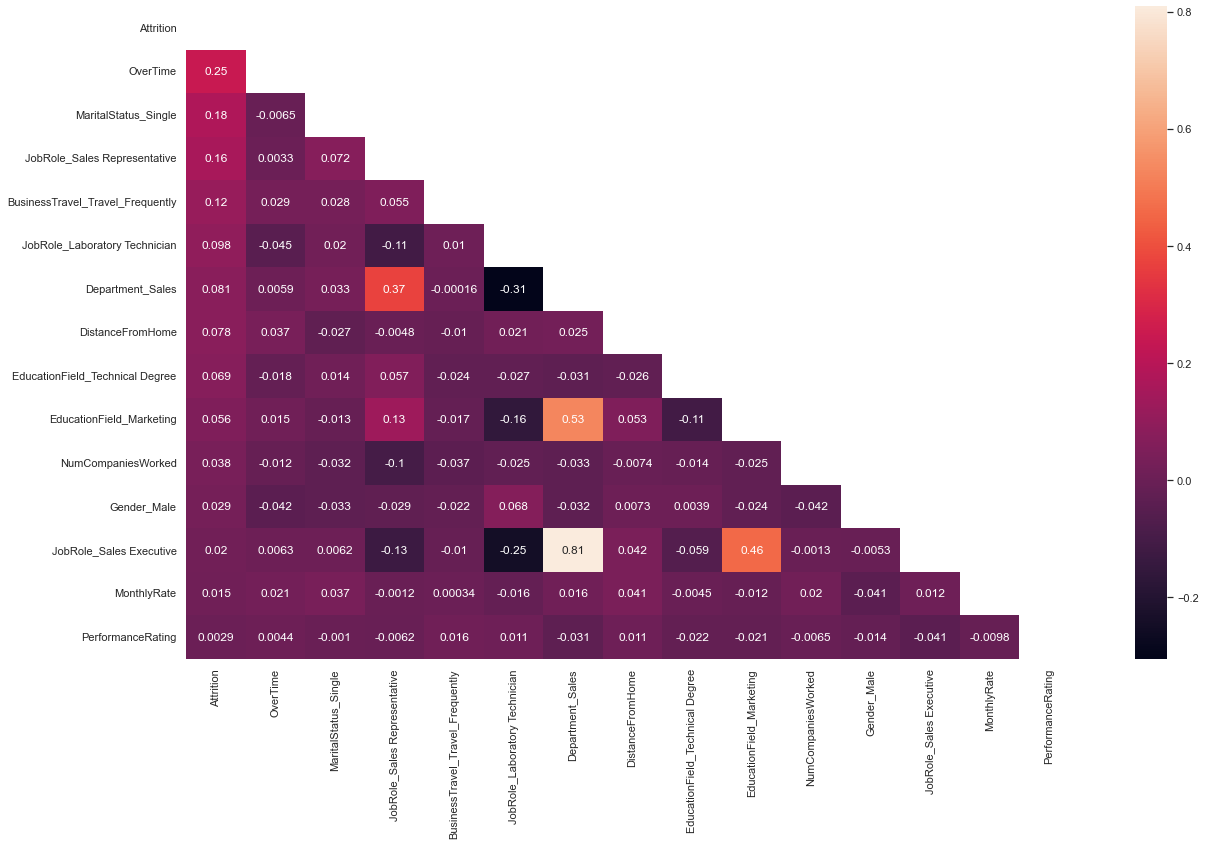

In [57]:
corr=df.corr()
cols=corr.nlargest(15,'Attrition').index
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(20,12))
sns.heatmap(cm,annot=True, yticklabels = cols.values, xticklabels = cols.values, mask = np.triu(cm))

<AxesSubplot:>

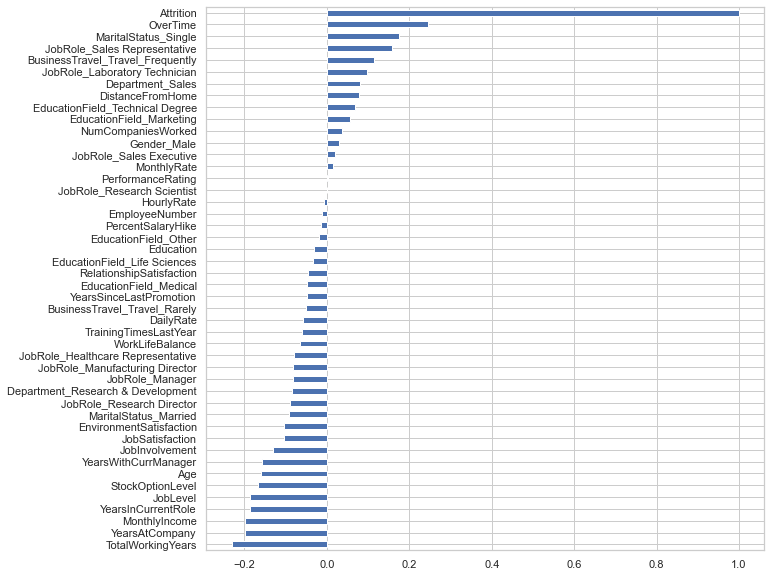

In [58]:
plt.rcParams['figure.figsize'] = (10, 10.0)
df.corr()['Attrition'].sort_values().plot(kind = "barh")

**Top 20 Features having a correlation with the Target Variable**

# Suggestions :-

- JobRole or Department ? (Collinearity is present for these 2 features )
- Dropping the Department Column would be a wiser choice as JobRole will get a clearer picture on the specific profiles to look into

In [59]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,0.693147,2,1,2,94,3,1.098612,4,8.698514,19479,2.197225,1,11,1.386294,1,0.000000,2.197225,0,1,1.945910,1.609438,0.000000,5,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,49,0,279,2.197225,1,2,3,61,2,1.098612,2,8.543056,24907,0.693147,0,23,1.609438,4,0.693147,2.397895,3,3,2.397895,2.079442,0.693147,7,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2,37,1,1373,1.098612,2,4,4,92,2,0.693147,3,7.645398,2396,1.945910,1,15,1.386294,2,0.000000,2.079442,3,3,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
3,33,0,1392,1.386294,4,5,4,56,3,0.693147,3,7.975908,23159,0.693147,1,11,1.386294,3,0.000000,2.197225,3,3,2.197225,2.079442,1.386294,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,27,0,591,1.098612,1,7,1,40,3,0.693147,2,8.151622,16632,2.302585,0,12,1.386294,4,0.693147,1.945910,3,3,1.098612,1.098612,1.098612,2,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [60]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Rarely',
       'BusinessTravel_Travel_Frequently', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Medical', 'EducationField_Marketing',
       'EducationField_Technical Degree', 'EducationField_Other',
       'Gender_Male', 'JobRole_Sales Executive', 'JobRole_Research Scientist',
       'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director',
       

In [61]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
cols=list(df.columns)
cols.remove('Attrition')
for col in cols:
    df[col]=df[col].astype(float)
    df[[col]]=ss.fit_transform(df[[col]])
df['Attrition']=pd.to_numeric(df['Attrition'],downcast='integer')

In [62]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Rarely,BusinessTravel_Travel_Frequently,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Medical,EducationField_Marketing,EducationField_Technical Degree,EducationField_Other,Gender_Male,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,0.742527,-1.505350,-0.891688,-1.701283,-0.660531,1.383138,0.379672,0.112298,1.153254,0.219493,0.726020,1.660254,1.591746,-1.150554,-0.426230,-1.584178,-1.056106,-0.138921,-2.171982,-2.493820,0.177344,0.290611,-0.973342,0.245834,0.639841,-0.481859,-1.374051,1.515244,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
1,1.322365,0,-1.297775,0.252002,-1.868426,-1.699621,0.254625,-0.240677,-1.026167,0.112298,-0.660853,-0.014600,1.488876,-0.586417,-0.628241,2.129306,2.346151,1.191438,0.471284,0.148411,0.155707,0.338096,0.774724,0.882670,-0.117271,0.806541,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
2,0.008343,1,1.414363,-1.031607,-0.891688,-1.696298,1.169781,1.284725,-1.026167,-1.094180,0.246200,-1.366318,-1.674841,1.284860,1.591746,-0.057267,-0.426230,-0.658973,-1.056106,-0.307569,0.155707,0.338096,-2.394527,-1.736783,-0.973342,-1.155935,0.639841,-0.481859,0.727775,-0.659960,-0.837490,-0.679141,-0.348255,-0.314093,4.114223,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
3,-0.429664,0,1.461466,-0.695482,1.061787,-1.694636,1.169781,-0.486709,0.379672,-1.094180,0.246200,-0.868626,1.243211,-0.586417,1.591746,-1.150554,-0.426230,0.266233,-1.056106,-0.138921,0.155707,0.338096,0.509502,0.882670,0.738799,-1.155935,-1.562889,2.075297,0.727775,-0.659960,1.194045,-0.679141,-0.348255,-0.314093,-0.243059,-1.224745,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,-1.086676,0,-0.524295,-1.031607,-1.868426,-1.691313,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,-0.604032,0.325900,1.817633,-0.628241,-0.877232,-0.426230,1.191438,0.471284,-0.498767,0.155707,0.338096,-0.942513,-0.352871,0.383498,-0.595227,0.639841,-0.481859,0.727775,-0.659960,-0.837490,1.472448,-0.348255,-0.314093,-0.243059,0.816497,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
